In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).all()
recent_date

[('2017-08-23',)]

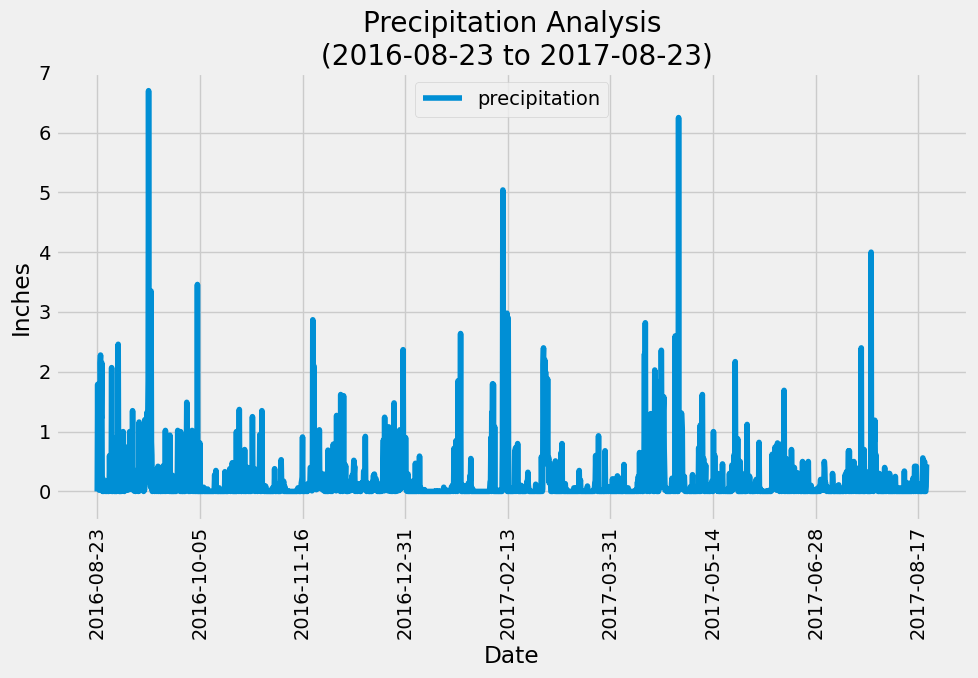

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago = year_ago.strftime("%Y-%m-%d")

# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_scores, columns=['date', 'precipitation'])

# Sort the dataframe by date
prcp_df.set_index('date', inplace=True)
prcp_df.sort_values(by='date', ascending=True, inplace=True)
prcp_df.dropna(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize=(10,7))
plt.title(f"Precipitation Analysis\n ({year_ago} to {recent_date[0][0]})")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc='upper center')
plt.xticks(rotation=90)
plt.ylim(-0.5,7)
plt.tight_layout()
plt.savefig("../Images/Precipitation_Analysis.png")
plt.show()

In [41]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement).group_by(measurement.station).count()

9

In [48]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Hint: You will need to use functions such as func.min, func.max, func.avg, and func.count in your queries.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == active_station[0][0]).all()

[(54.0, 85.0, 71.66378066378067)]

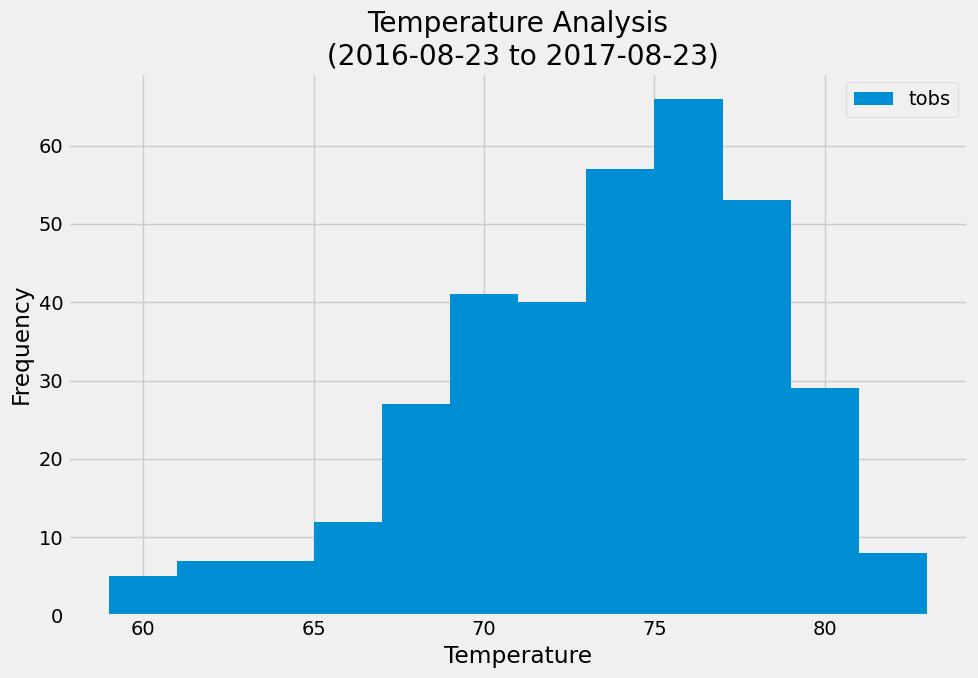

In [55]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_scores = session.query(measurement.tobs).filter(measurement.station == active_station[0][0]).filter(measurement.date >= year_ago).all()
tobs_df = pd.DataFrame(tobs_scores, columns=['tobs'])
tobs_df.plot.hist(bins=12, figsize=(10,7))
plt.title(f"Temperature Analysis\n ({year_ago} to {recent_date[0][0]})")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("../Images/Temperature_Analysis.png")
plt.show()

# Close Session

In [56]:
# Close Session
session.close()